In [ ]:
## Data Analysis File 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from textblob import TextBlob
from wordcloud import WordCloud
from nltk.corpus import stopwords
from collections import Counter
import re

In [2]:
#data1=pd.read_json("corona-out-2",lines=True)
twitter_data=pd.read_json("corona-out-3",lines=True)

In [3]:
twitter_data.head()

,created_at,id,id_str,text,display_text_range,source,truncated,in_reply_to_status_id,in_reply_to_status_id_str,in_reply_to_user_id,...,filter_level,lang,timestamp_ms,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status,quoted_status_permalink,extended_tweet,withheld_in_countries
0,2020-04-25 12:21:41+00:00,1254022770679320576,1254022770679320576,"É isto, ou vou morrer sem ar ou com o corona h...","[0, 44]","<a href=""http://twitter.com/download/android"" ...",False,NaN,NaN,NaN,...,low,pt,2020-04-25 12:21:41.803,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2020-04-25 12:21:41+00:00,1254022770746372096,1254022770746372096,Schöne Runde mit dem Rennrad ✌️\n#sport #coron...,"[0, 46]","<a href=""http://twitter.com/download/iphone"" r...",False,NaN,NaN,NaN,...,low,de,2020-04-25 12:21:41.819,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2020-04-25 12:21:42+00:00,1254022772558368768,1254022772558368768,RT @BJP4India: India’s war with Corona is ongo...,NaN,"<a href=""http://twitter.com/download/android"" ...",False,NaN,NaN,NaN,...,low,en,2020-04-25 12:21:42.251,{'created_at': 'Sat Apr 25 07:30:12 +0000 2020...,NaN,NaN,NaN,NaN,NaN,NaN
3,2020-04-25 12:21:42+00:00,1254022772575043586,1254022772575043584,Was sollen 150 Euro Computerzuschuss bringen? ...,NaN,"<a href=""https://mobile.twitter.com"" rel=""nofo...",True,NaN,NaN,NaN,...,low,de,2020-04-25 12:21:42.255,NaN,1.254016e+18,1.254016e+18,{'created_at': 'Sat Apr 25 11:56:31 +0000 2020...,"{'url': 'https://t.co/xn4jgGqfoY', 'expanded':...",{'full_text': 'Was sollen 150 Euro Computerzus...,NaN
4,2020-04-25 12:21:42+00:00,1254022772877131777,1254022772877131776,RT @schrodingerk42: @ozkan_yalim @DurmusYillma...,NaN,"<a href=""http://twitter.com/download/android"" ...",False,NaN,NaN,NaN,...,low,tr,2020-04-25 12:21:42.327,{'created_at': 'Tue Apr 21 12:34:00 +0000 2020...,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
twitter_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101916 entries, 0 to 101915
Data columns (total 39 columns):
 #   Column                     Non-Null Count   Dtype              
---  ------                     --------------   -----              
 0   created_at                 101916 non-null  datetime64[ns, UTC]
 1   id                         101916 non-null  int64              
 2   id_str                     101916 non-null  int64              
 3   text                       101916 non-null  object             
 4   display_text_range         18124 non-null   object             
 5   source                     101916 non-null  object             
 6   truncated                  101916 non-null  bool               
 7   in_reply_to_status_id      13610 non-null   float64            
 8   in_reply_to_status_id_str  13610 non-null   float64            
 9   in_reply_to_user_id        14855 non-null   float64            
 10  in_reply_to_user_id_str    14855 non-null   float64     

## Total number of unique users

In [9]:
twitter_data["user_id"] = twitter_data["user"].apply(lambda x: x["id"])

num_users = len(twitter_data["user_id"].unique())

num_users

80943

## Content Analysis

In [11]:
# Define content categories and their corresponding keywords
content_categories = {
    'News': ['breaking', 'news', 'update', 'headline'],
    'Sports': ['sports', 'game', 'score', 'match'],
    'Entertainment': ['movie', 'music', 'entertainment', 'celebrity'],
    'Politics': ['politics', 'election', 'government', 'president'],
    'Technology': ['tech', 'technology', 'gadget', 'innovation'],
    'Health': ['health', 'wellness', 'medical', 'fitness']
}

# Function to categorize tweets into content categories
def categorize_tweet_content(text):
    for category, keywords in content_categories.items():
        for keyword in keywords:
            if keyword in text.lower():
                return category
    return 'Other'  # If tweet doesn't match any category

# Apply categorization function to each tweet
twitter_data['content_category'] = twitter_data['text'].apply(categorize_tweet_content)

# Count the number of tweets in each content category
category_counts = twitter_data['content_category'].value_counts()

# Print the counts of tweets in each content category
print("Content Category Counts:")
print(category_counts)


Content Category Counts:
Other            90914
Politics          4813
News              4097
Health            1122
Entertainment      447
Sports             365
Technology         158
Name: content_category, dtype: int64


## Displaying the top 5 most common hashtags

In [13]:

hashtags = twitter_data["entities"].apply(
    lambda x: [tag["text"].lower() for tag in x["hashtags"]])

hashtags = hashtags.explode()
print(hashtags.value_counts().head())

corona         6096
25aprile       1557
mattarella     1507
coronavirus    1317
covid19        1256
Name: entities, dtype: int64


## Sentiment analysis ( 1 stand for positive and -1 for negative text)

In [14]:
def get_tweet_sentiment(tweet):
    analysis = TextBlob(tweet)
    return analysis.sentiment.polarity

# Apply the function to the tweet text column
twitter_data['sentiment_polarity'] = twitter_data['text'].apply(get_tweet_sentiment)

# Print the average sentiment polarity of the tweets
print('Average Sentiment Polarity:', twitter_data['sentiment_polarity'].mean())

Average Sentiment Polarity: 0.024726337930912782


## top 10 most common languages used

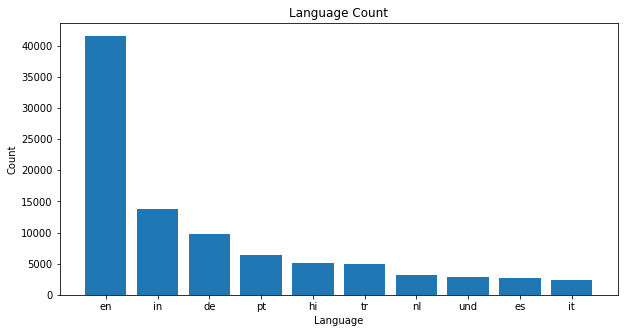

In [15]:
language_count = twitter_data["lang"].value_counts().head(10)

fig, ax = plt.subplots(figsize=(10, 5))
ax.bar(language_count.index, language_count.values)
ax.set_title("Language Count")
ax.set_xlabel("Language")
ax.set_ylabel("Count")

plt.show()

## URL analysis

In [16]:
# Function to extract URLs from tweet text
def extract_urls(text):
    return re.findall(r'(https?://\S+)', text)

# Extract URLs from all tweets
all_tweets_urls = twitter_data['text'].apply(extract_urls).explode().dropna().unique()

# Function to parse domain from URL
def parse_domain(url):
    return urlparse(url).netloc

# Parse domains from URLs
all_domains = [parse_domain(url) for url in all_tweets_urls]

# Count the occurrences of each domain
domain_counts = pd.Series(all_domains).value_counts()

# Print the top N most shared domains
top_shared_domains = domain_counts.head(10)  # Change 10 to any desired number
print("Top Shared Domains:")
print(top_shared_domains)


Top Shared Domains:
t.co                 28054
82.221.129.208           2
…                        1
t.…                      1
t.co…                    1
t.c…                     1
t…                       1
hot.grid.id              1
twitter.com              1
www.covaimail.com        1
dtype: int64


## Number of tweets in both the days for which the data has been given to us 

In [21]:
tweets_per_day = twitter_data.groupby(twitter_data["created_at"].dt.date).size()
print(tweets_per_day)

created_at
2020-04-25    101916
dtype: int64


## Most common words in a tweet

In [17]:
# Define a function to extract words from a tweet
def extract_words(text):
    words = re.findall(r'\w+', text.lower())
    return Counter(words)

# Extract the words from all the tweets
words = Counter()
for tweet in twitter_data["text"]:
    words.update(extract_words(tweet))

# Print the top 10 most common words
print(words.most_common(10))

[('rt', 61441), ('corona', 60901), ('t', 45204), ('https', 42383), ('co', 41446), ('the', 24597), ('in', 17576), ('to', 17001), ('a', 15502), ('क', 14703)]


## Categorizing each tweet

In [22]:
def categorize_tweet(row):
    if isinstance(row['retweeted_status'], dict):
        return 'Retweet'
    elif isinstance(row['quoted_status'], dict):
        return 'Quoted Tweet'
    else:
        return 'Original Tweet'

# Apply the categorize_tweet function to each row of the DataFrame
twitter_data['tweet_type'] = twitter_data.apply(categorize_tweet, axis=1)

## Number of tweets for each tweet type

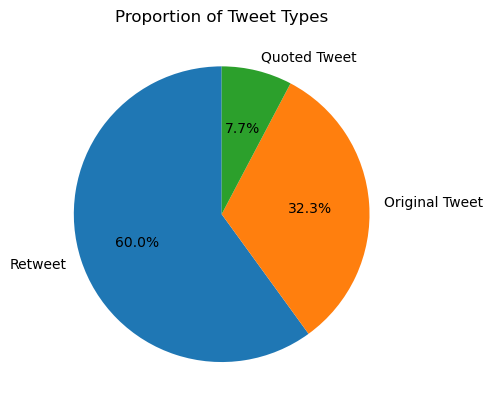

In [49]:
tweet_counts = twitter_data['tweet_type'].value_counts()

# Create a pie chart showing the proportion of each tweet type
plt.pie(tweet_counts, labels=tweet_counts.index, autopct='%1.1f%%', startangle=90)

# Add a title
plt.title('Proportion of Tweet Types')

# Display the plot
plt.show()

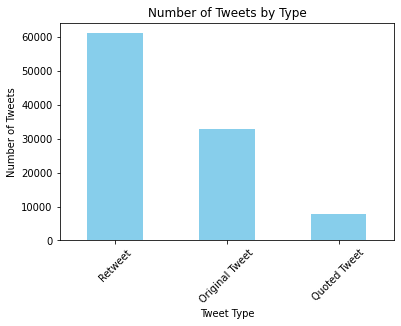

In [19]:
import matplotlib.pyplot as plt

# Count the number of tweets for each tweet type
tweet_counts = twitter_data['tweet_type'].value_counts()

# Create a bar plot showing the proportion of each tweet type
tweet_counts.plot(kind='bar', color='skyblue')

# Add labels and title
plt.xlabel('Tweet Type')
plt.ylabel('Number of Tweets')
plt.title('Number of Tweets by Type')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Display the plot
plt.show()


##  The top 10 most mentioned users in the tweets.

In [23]:
# extract usernames from the text column using regex
usernames = twitter_data['text'].apply(lambda x: re.findall(r'(?<!\w)@\w+', x))

In [24]:
# flatten the list of usernames and count their frequency
mentions_count = pd.Series([u for sublist in usernames for u in sublist]).value_counts()

In [25]:
# get the top 10 most mentioned users
top_mentions = mentions_count.head(10)

# print the top 10 most mentioned users
print(top_mentions)

@brithume           1496
@Quirinale          1465
@benwikler           987
@oxfara              846
@yalim_funda         734
@realDonaldTrump     700
@narendramodi        636
@aajtak              625
@CrazyinRussia       587
@IngrahamAngle       559
dtype: int64
